Exercice 4 :

In [6]:
# Imports
import numpy
import tqdm
import seaborn
import pandas
import matplotlib.pyplot as pyplot

from sklearn import datasets
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

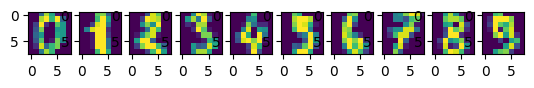

In [8]:
# Chargement des données
digits = datasets.load_digits() 
 
# Affichage des 10 premières images 
fig = pyplot.figure() 
for i, digit in enumerate(digits.images[:10]): 
    fig.add_subplot(1,10,i+1) 
    pyplot.imshow(digit) 
pyplot.show()

# Séparation des données
X = pandas.DataFrame(digits.data, columns=digits.feature_names).copy()
Y = pandas.DataFrame(digits.target).copy()

# Découpage en Apprentissage/Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.9, test_size=0.1, random_state=0)

1. Entrainer un arbre de décision pour classer les données des chiffres manuscrits (base digits). 

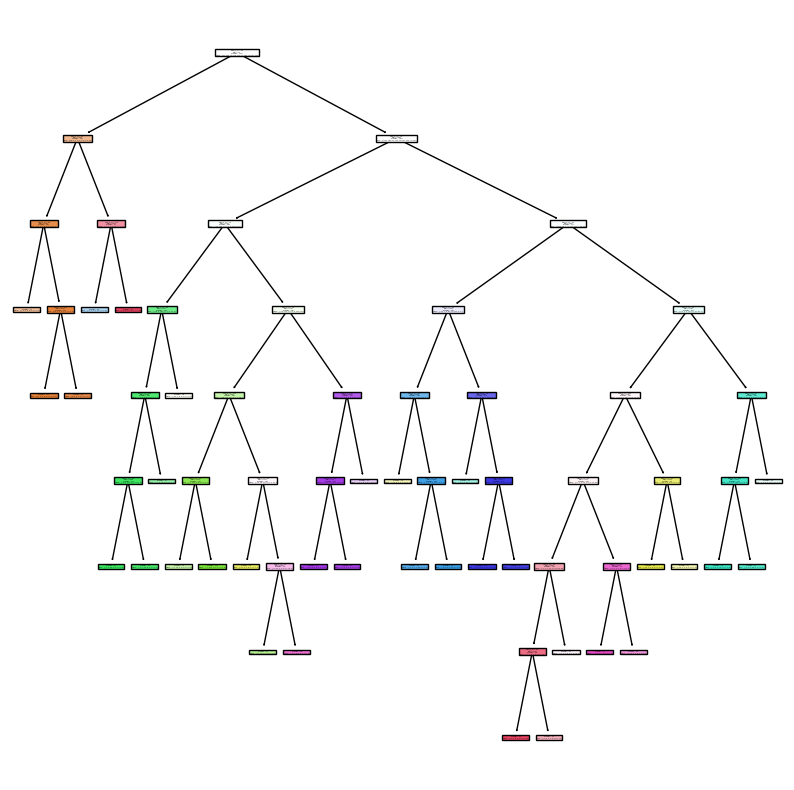

In [9]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=30)
clf.fit(X_train, Y_train)

# Visualisation de l'arbre
pyplot.figure(figsize=(10,10))
plot_tree(clf,feature_names = X.columns,filled=True)
pyplot.show()

In [11]:
clf.score(X_test,pandas.Series.ravel(Y_test))

0.7777777777777778

2. Entrainer un SVM meilleur que cette arbre de décision

In [15]:
poly100_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf", SVC(kernel="poly", degree=10, coef0=100 , C=5))])
poly100_kernel_svm_clf.fit(X_train, pandas.Series.ravel(Y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [14]:
poly100_kernel_svm_clf.score(X_test,pandas.Series.ravel(Y_test))

0.9722222222222222